In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [3]:
#Data reading 
Phy_Che = pd.read_pickle('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.pkl')
display(Phy_Che)

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Aquatic_500.t,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,-0.635657,-0.402250,0.910612,-0.067940,-0.654950,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,0.849086,-0.459558,1.063622,-0.346234,0.579132,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,-0.635657,0.357345,0.357345,-0.036563,-0.183805,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,1.120502,-0.152026,0.413601,0.459558,0.078412,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,-0.635657,-0.026114,0.269558,0.591528,-0.554602,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,Spring,7.880,...,-0.635657,-1.731664,-0.776422,1.665398,-1.150349,0.000000,0.000000,-0.822105,1.665398,0.000000
237,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,Spring,7.800,...,-0.635657,-1.731664,-0.194437,1.343325,-1.150349,0.000000,0.000000,-0.219486,1.343325,0.000000
238,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,Spring,9.610,...,-0.635657,-0.335166,-1.181259,1.369531,-0.390951,0.000000,-0.491989,-1.260117,1.369531,-1.123769
239,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,Spring,8.470,...,-0.635657,-0.324138,-0.604016,1.140287,-1.150349,0.000000,-0.479169,-0.641518,1.140287,0.000000


In [9]:
vars=['Pond_ID', 'PondCode', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col','Area.t', 'Depth.t','TN', 'TP','bio1.t', 'bio4.t', 'bio5.t','bio12.t','Hydeoperiod_length.t',
       'Animals_cont.t', 'Natural_5.t','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt',]

In [4]:
set(Phy_Che['Country'])

{'Belgium',
 'Denmark',
 'Germany',
 'Spain',
 'Switzerland',
 'Turkey',
 'UK',
 'Uruguay'}

## Full tree

In [11]:
Phy_Che_rf_df =Phy_Che[vars].dropna()
display(Phy_Che_rf_df)

,Pond_ID,PondCode,Pondscape,Country,Strat_Survey,Resampling,season_col,Area.t,Depth.t,TN,...,bio5.t,bio12.t,Hydeoperiod_length.t,Animals_cont.t,Natural_5.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,Antwerp,Belgium,1,0,Spring,7.247081,-0.667948,1.30,...,-0.324138,0.318639,0.487558,0.390951,-1.354013,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,Antwerp,Belgium,1,0,Spring,6.510261,-0.542462,3.20,...,-0.368501,0.318639,0.487558,0.390951,-0.152667,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,Antwerp,Belgium,1,0,Spring,7.475340,-0.864160,1.85,...,-0.379702,0.318639,0.487558,0.390951,0.057716,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,Antwerp,Belgium,1,0,Spring,5.886112,-1.082193,3.60,...,-0.530402,0.362917,0.487558,0.390951,-1.753607,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,Antwerp,Belgium,1,0,Spring,9.047821,-1.140287,2.65,...,-0.346234,0.318639,0.487558,0.390951,-0.308999,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,Valle del Cordillera,Uruguay,1,1,Spring,6.430480,0.390951,0.58,...,0.797777,0.841621,0.487558,0.942702,-1.753607,0.000000,0.000000,-0.822105,1.665398,0.000000
237,URG027,VCL3,Valle del Cordillera,Uruguay,1,1,Spring,5.133831,0.109886,0.56,...,0.797777,0.841621,0.487558,0.942702,-1.354013,0.000000,0.000000,-0.219486,1.343325,0.000000
238,URG028,VCH1,Valle del Cordillera,Uruguay,1,1,Spring,8.553309,0.291285,2.00,...,0.797777,0.841621,0.487558,1.454408,-1.753607,0.000000,-0.491989,-1.260117,1.369531,-1.123769
239,URG029,VCH2,Valle del Cordillera,Uruguay,1,1,Spring,6.587290,-0.335166,1.05,...,0.797777,0.841621,0.487558,1.454408,-1.753607,0.000000,-0.479169,-0.641518,1.140287,0.000000


In [18]:
dependent_var='TP'
# Split the data into features (X) and target (y)
X = Phy_Che_rf_df[['Area.t', 'Depth.t','bio1.t', 'bio4.t', 'bio5.t','bio12.t','Hydeoperiod_length.t',
       'Animals_cont.t', 'Natural_5.t','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_rf_df[f'{dependent_var}']


In [19]:

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=20, random_state=0, oob_score=True,max_depth=4, )
#ccp_alpha=0.01)
 
# Fit the regressor with x and y data
regressor.fit(X, y)

/Users/lidiayung/miniforge3/envs/cstar/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(max_depth=4, n_estimators=20, oob_score=True,
                      random_state=0)

In [21]:
print(f"{dependent_var} RF Decision Tree in all regions from the whole dataset")

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {round(oob_score,2)}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {round(mse,2)}')

r2 = r2_score(y, predictions)
print(f'R-squared:{round(r2,2)}')


TP RF Decision Tree in all regions from the whole dataset
Out-of-Bag Score: -0.01
Mean Squared Error: 0.1
R-squared:0.62


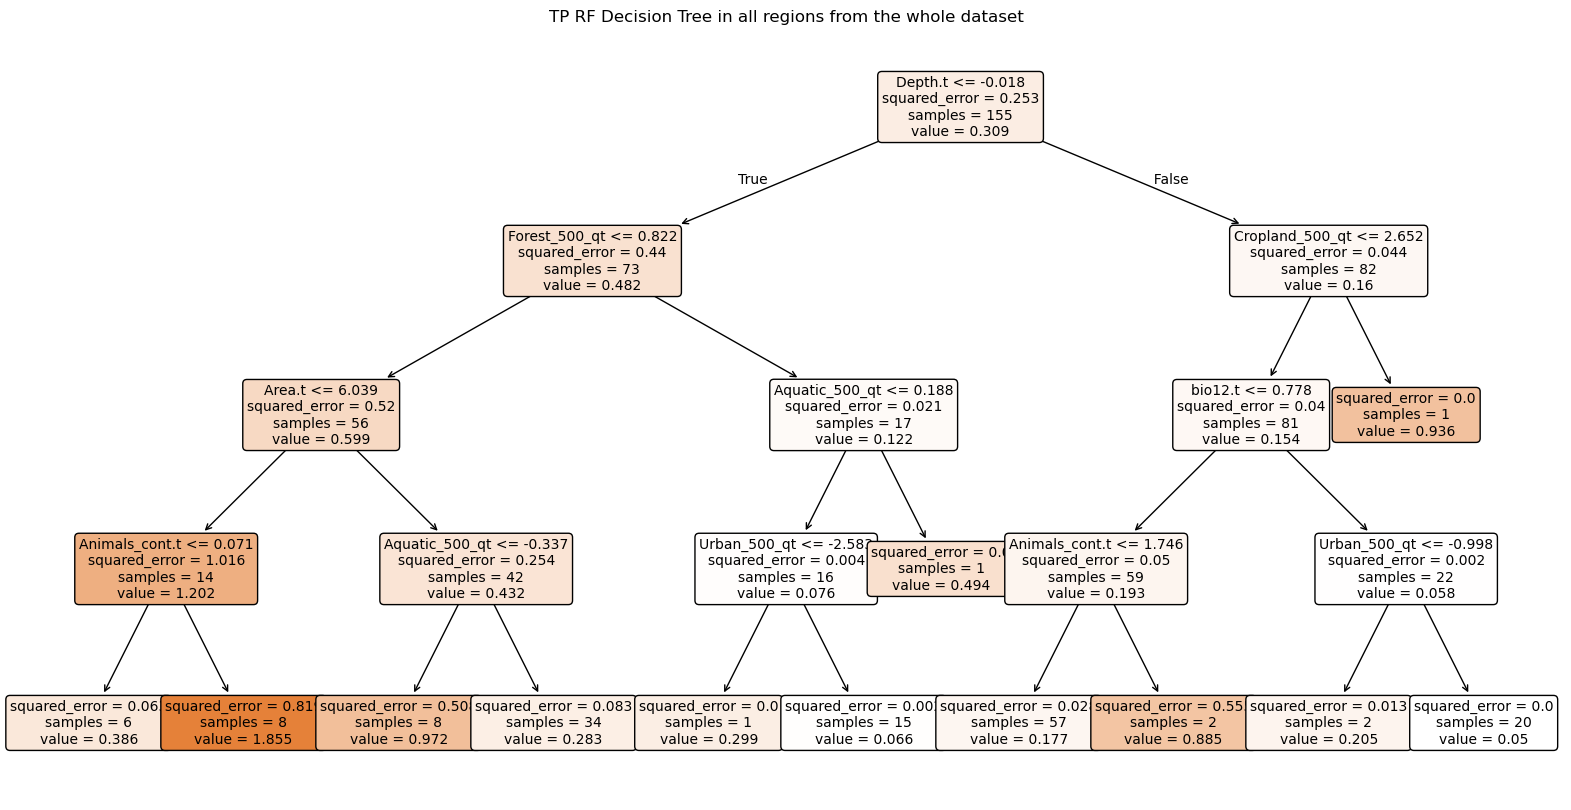

In [22]:

# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title(f"{dependent_var} RF Decision Tree in all regions from the whole dataset")
plt.show()


### Eco regions

In [170]:
# subterranean ponds Spain; Temperature ponds Belgium, Germany, Switzerland, Denmark and UK; Continental Turkey;subtropical Uruguay
region='Temperature'
#Phy_Che_sub=Phy_Che[Phy_Che['Country']==f'{region}'|]
#display(Phy_Che_sub)

Phy_Che_sub=Phy_Che[(Phy_Che['Country']!=f'Spain')&(Phy_Che['Country']!='Uruguay')&(Phy_Che['Country']!='Turkey')]
display(Phy_Che_sub)

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Aquatic_500.t,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,-0.635657,-0.402250,0.910612,-0.067940,-0.654950,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,0.849086,-0.459558,1.063622,-0.346234,0.579132,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,-0.635657,0.357345,0.357345,-0.036563,-0.183805,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,1.120502,-0.152026,0.413601,0.459558,0.078412,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,-0.635657,-0.026114,0.269558,0.591528,-0.554602,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,UK026,CSH-WOOD,-2.836372,53.141020,Cheshire,UK,1,1,Spring,7.300,...,-0.635657,0.047017,0.152026,0.629279,0.425005,0.000000,-0.062707,0.133159,0.629279,0.132683
208,UK027,CSH-SECU,-2.843690,53.140618,Cheshire,UK,1,1,Spring,8.900,...,-0.635657,0.247958,0.015667,0.530402,0.642061,0.000000,0.154427,-0.005311,0.530402,0.392831
209,UK028,CSH-GAME,-2.862481,53.139108,Cheshire,UK,1,1,Spring,7.100,...,1.009990,-0.269558,0.554602,0.494670,-1.150349,0.442822,-0.416188,0.540310,0.494670,0.000000
210,UK029,CSH-ISLA,-2.861053,53.106577,Cheshire,UK,1,1,Spring,7.900,...,0.078412,1.027539,-0.258743,-0.247958,0.804976,-2.221520,0.970458,-0.285288,-0.247958,0.581192


In [171]:

Phy_Che_random_forest_df = Phy_Che_sub[vars]
display(Phy_Che_random_forest_df)

,Pond_ID,PondCode,Pondscape,Country,Strat_Survey,Resampling,season_col,Area.t,Depth.t,TN,...,bio5.t,bio12.t,Hydeoperiod_length.t,Animals_cont.t,Natural_5.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,Antwerp,Belgium,1,0,Spring,7.247081,-0.667948,1.300,...,-0.324138,0.318639,0.487558,0.390951,-1.354013,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,Antwerp,Belgium,1,0,Spring,6.510261,-0.542462,3.200,...,-0.368501,0.318639,0.487558,0.390951,-0.152667,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,Antwerp,Belgium,1,0,Spring,7.475340,-0.864160,1.850,...,-0.379702,0.318639,0.487558,0.390951,0.057716,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,Antwerp,Belgium,1,0,Spring,5.886112,-1.082193,3.600,...,-0.530402,0.362917,0.487558,0.390951,-1.753607,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,Antwerp,Belgium,1,0,Spring,9.047821,-1.140287,2.650,...,-0.346234,0.318639,0.487558,0.390951,-0.308999,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,UK026,CSH-WOOD,Cheshire,UK,1,1,Spring,8.987197,0.494670,1.555,...,-0.887147,0.104633,0.487558,-0.247958,1.051809,0.000000,-0.062707,0.133159,0.629279,0.132683
208,UK027,CSH-SECU,Cheshire,UK,1,1,Spring,6.984717,0.368501,1.700,...,-0.887147,0.104633,0.487558,-1.120502,-0.036716,0.000000,0.154427,-0.005311,0.530402,0.392831
209,UK028,CSH-GAME,Cheshire,UK,1,1,Spring,7.056176,-0.518418,2.815,...,-0.864160,0.057475,0.487558,-0.247958,1.051809,0.442822,-0.416188,0.540310,0.494670,0.000000
210,UK029,CSH-ISLA,Cheshire,UK,1,1,Spring,7.783224,1.269770,1.655,...,-0.918546,0.015667,0.487558,-0.247958,1.051809,-2.221520,0.970458,-0.285288,-0.247958,0.581192


In [172]:
#UK lancaster has NA values for both TP and TP
Phy_Che_random_forest_df.dropna(inplace=True)

In [173]:
Phy_Che_random_forest_df


,Pond_ID,PondCode,Pondscape,Country,Strat_Survey,Resampling,season_col,Area.t,Depth.t,TN,...,bio5.t,bio12.t,Hydeoperiod_length.t,Animals_cont.t,Natural_5.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,Antwerp,Belgium,1,0,Spring,7.247081,-0.667948,1.300,...,-0.324138,0.318639,0.487558,0.390951,-1.354013,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,Antwerp,Belgium,1,0,Spring,6.510261,-0.542462,3.200,...,-0.368501,0.318639,0.487558,0.390951,-0.152667,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,Antwerp,Belgium,1,0,Spring,7.475340,-0.864160,1.850,...,-0.379702,0.318639,0.487558,0.390951,0.057716,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,Antwerp,Belgium,1,0,Spring,5.886112,-1.082193,3.600,...,-0.530402,0.362917,0.487558,0.390951,-1.753607,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,Antwerp,Belgium,1,0,Spring,9.047821,-1.140287,2.650,...,-0.346234,0.318639,0.487558,0.390951,-0.308999,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,UK026,CSH-WOOD,Cheshire,UK,1,1,Spring,8.987197,0.494670,1.555,...,-0.887147,0.104633,0.487558,-0.247958,1.051809,0.000000,-0.062707,0.133159,0.629279,0.132683
208,UK027,CSH-SECU,Cheshire,UK,1,1,Spring,6.984717,0.368501,1.700,...,-0.887147,0.104633,0.487558,-1.120502,-0.036716,0.000000,0.154427,-0.005311,0.530402,0.392831
209,UK028,CSH-GAME,Cheshire,UK,1,1,Spring,7.056176,-0.518418,2.815,...,-0.864160,0.057475,0.487558,-0.247958,1.051809,0.442822,-0.416188,0.540310,0.494670,0.000000
210,UK029,CSH-ISLA,Cheshire,UK,1,1,Spring,7.783224,1.269770,1.655,...,-0.918546,0.015667,0.487558,-0.247958,1.051809,-2.221520,0.970458,-0.285288,-0.247958,0.581192


## TP tree

In [174]:
dependent_var='TP'

### TP Tree full and k-fold validation

In [175]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area.t', 'Depth.t','bio1.t', 'bio4.t', 'bio5.t','bio12.t','Hydeoperiod_length.t',
       'Animals_cont.t', 'Natural_5.t','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_random_forest_df[f'{dependent_var}']


In [185]:

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=20, random_state=0, oob_score=True,max_depth=4, )
#ccp_alpha=0.01)
 
# Fit the regressor with x and y data
regressor.fit(X, y)

RandomForestRegressor(max_depth=4, n_estimators=20, oob_score=True,
                      random_state=0)

In [186]:
param_grid = {
    'weights': [np.array([0.1] * 20), np.array([0.2] * 20), np.array([0.5] * 20), np.array([1.0] * 20)]
}

# Custom function to fit and score the model with different weights
def score_with_weights(weights):
    tree_predictions = np.array([tree.predict(X) for tree in regressor.estimators_])
    weighted_predictions = np.average(tree_predictions, axis=0, weights=weights)
    return -mean_squared_error(y, weighted_predictions)

# Grid Search
best_score = float('inf')
best_weights = None
for weights in param_grid['weights']:
    score = score_with_weights(weights)
    if score < best_score:
        best_score = score
        best_weights = weights
print(f'Best Weights: {best_weights}')
print(f'Best Mean Squared Error: {-best_score}')

Best Weights: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]
Best Mean Squared Error: 0.08660670659521119


In [133]:
print('Parameters currently in use:\n')
print(regressor.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 10, 'n_jobs': None, 'oob_score': True, 'random_state': 0, 'verbose': 0, 'warm_start': False}


#### Fitting and evaluating the model

In [187]:
print(f"{dependent_var} RF Decision Tree in {region} from the whole dataset")

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {round(oob_score,2)}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {round(mse,2)}')

r2 = r2_score(y, predictions)
print(f'R-squared:{round(r2,2)}')


TP RF Decision Tree in Temperature from the whole dataset
Out-of-Bag Score: -0.12
Mean Squared Error: 0.09
R-squared:0.74


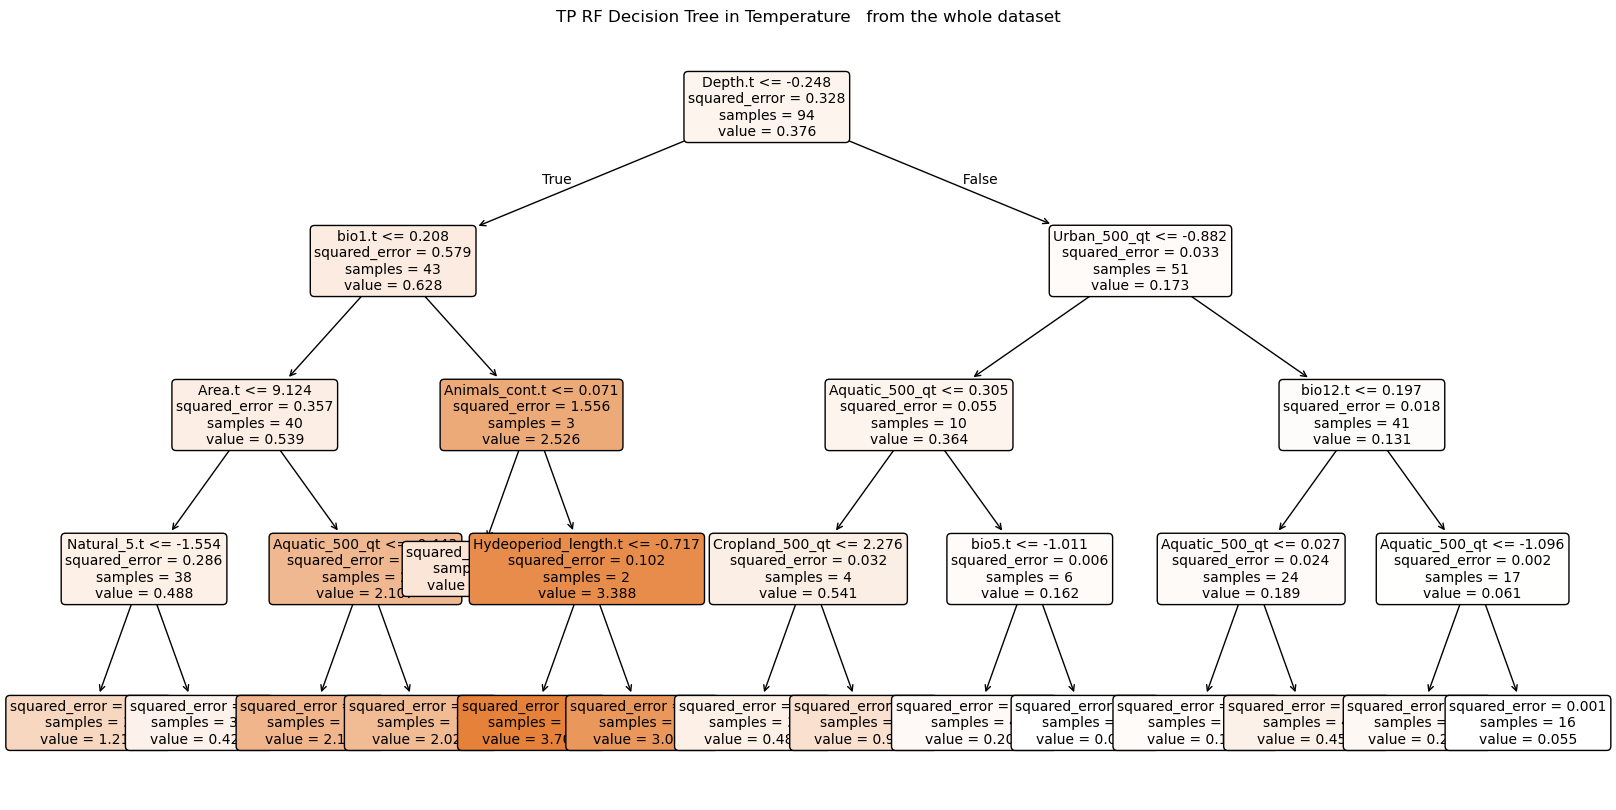

In [188]:

# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title(f"{dependent_var} RF Decision Tree in {region}   from the whole dataset")
plt.show()


In [136]:
print(f"k-fold {dependent_var} RF Decision Tree in {region} from the whole dataset")

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores  # Since cross_val_score returns negative MSE
print(f'MSE scores for each fold: {mse_scores}')
print(f'Average MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of MSE: {np.std(mse_scores)}')


k-fold TP RF Decision Tree in Temperature from the whole dataset
MSE scores for each fold: [0.15223228 0.2667234  0.51756755 0.32224418 0.52168005]
Average MSE: 0.35608949269031015
Standard Deviation of MSE: 0.1443502416787666


#### TP tree and test/train(0.2/0.8)

In [137]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [138]:

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True,max_depth=4)
#ccp_alpha=0.01)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=10, oob_score=True,
                      random_state=0)

In [139]:
print(f"{dependent_var} RF Decision Tree in {region} test/train")

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {round(oob_score,2)}')

# Making predictions on the same data or new data
predictions = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {round(mse,2)}')

r2 = r2_score(y_test, predictions)
print(f'R-squared:{round(r2,2)}')


TP RF Decision Tree in Temperature test/train
Out-of-Bag Score: -0.44
Mean Squared Error: 0.34
R-squared:-0.27


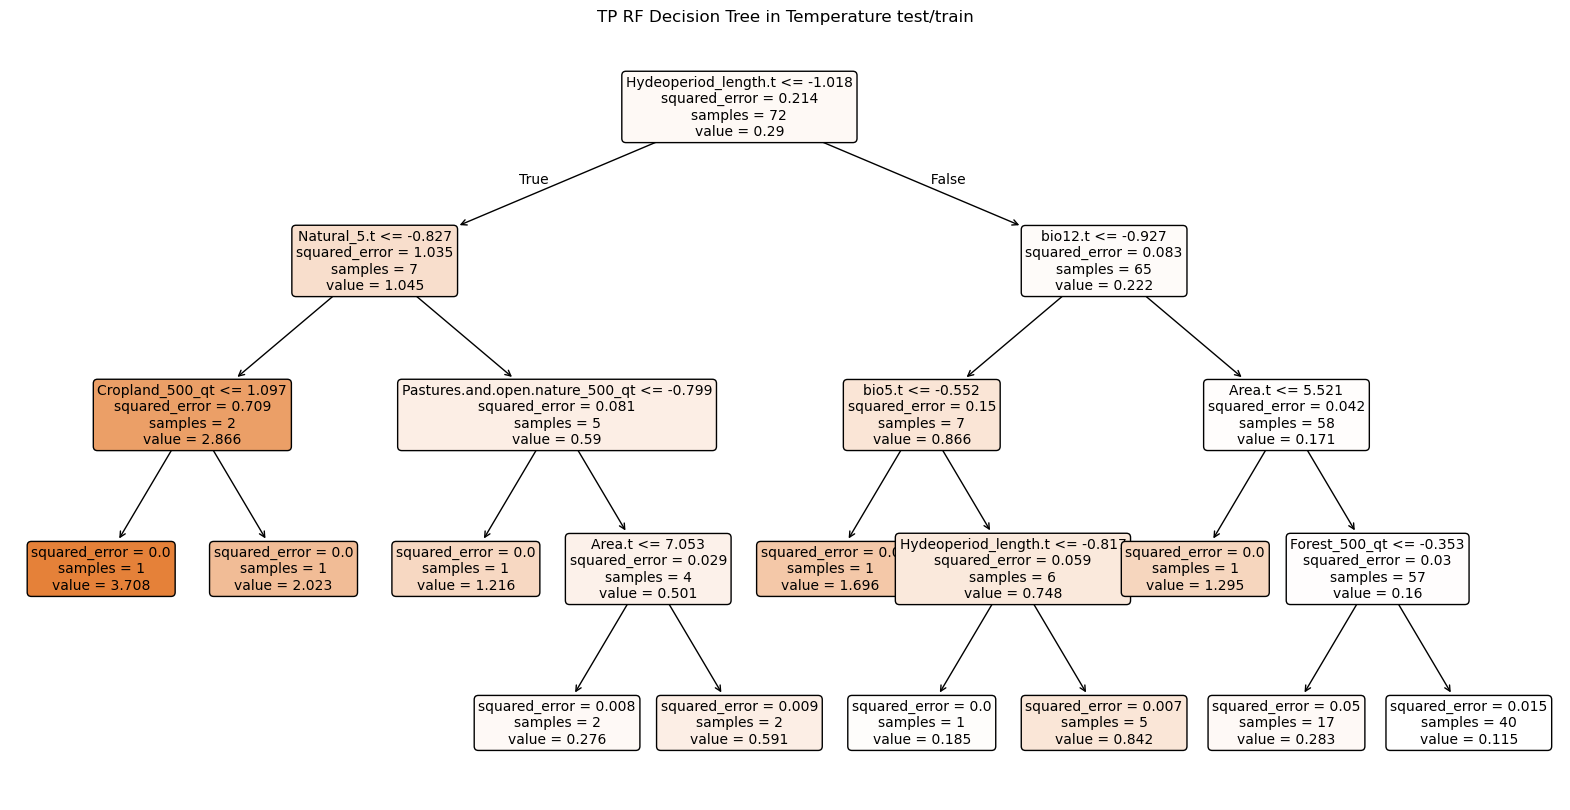

In [140]:
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title(f"{dependent_var} RF Decision Tree in {region} test/train")
plt.show()


## TN tree

In [155]:
dependent_var='TN'

### TN tree and k-fold validation

In [156]:

# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area.t', 'Depth.t','bio1.t', 'bio4.t', 'bio5.t','bio12.t','Hydeoperiod_length.t',
       'Animals_cont.t', 'Natural_5.t','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_random_forest_df[f'{dependent_var}']

In [157]:
regressor.fit(X,y)

ValueError: Input y contains NaN.

#### Fitting and evaluating the model

In [144]:
print(f"{dependent_var} RF Decision Tree in {region} from whole dataset")

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {round(oob_score,2)}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {round(mse,2)}')

r2 = r2_score(y, predictions)
print(f'R-squared:{round(r2,2)}')


TN RF Decision Tree in Temperature from whole dataset
Out-of-Bag Score: -0.1
Mean Squared Error: 0.7
R-squared:0.63


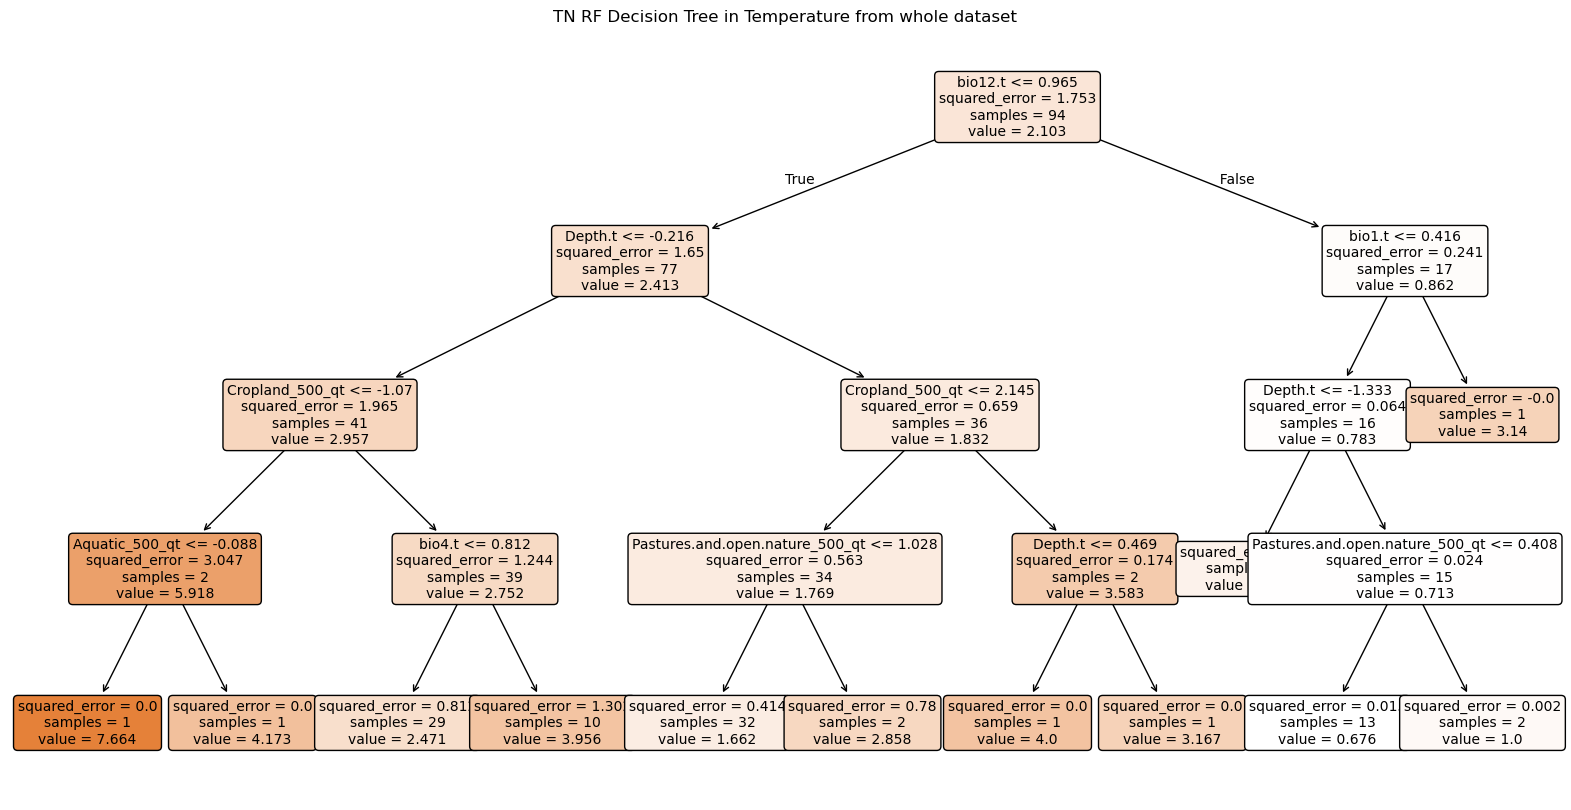

In [145]:
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title(f"{dependent_var} RF Decision Tree in {region} from whole dataset")
plt.show()


In [146]:
print(f"k-fold {dependent_var} RF Decision Tree in {region} from the whole dataset")

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores  # Since cross_val_score returns negative MSE
print(f'MSE scores for each fold: {mse_scores}')
print(f'Average MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of MSE: {np.std(mse_scores)}')


k-fold TN RF Decision Tree in Temperature from the whole dataset


MSE scores for each fold: [1.66761049 1.52994975 2.16604259 2.03318944 3.12853818]
Average MSE: 2.1050660904618477
Standard Deviation of MSE: 0.5618728900353648


### TN tree and test/train(0.2/0.8)

TN RF Decision Tree in Temperature test/train
Out-of-Bag Score: -0.15
Mean Squared Error: 2.76
R-squared:-0.2


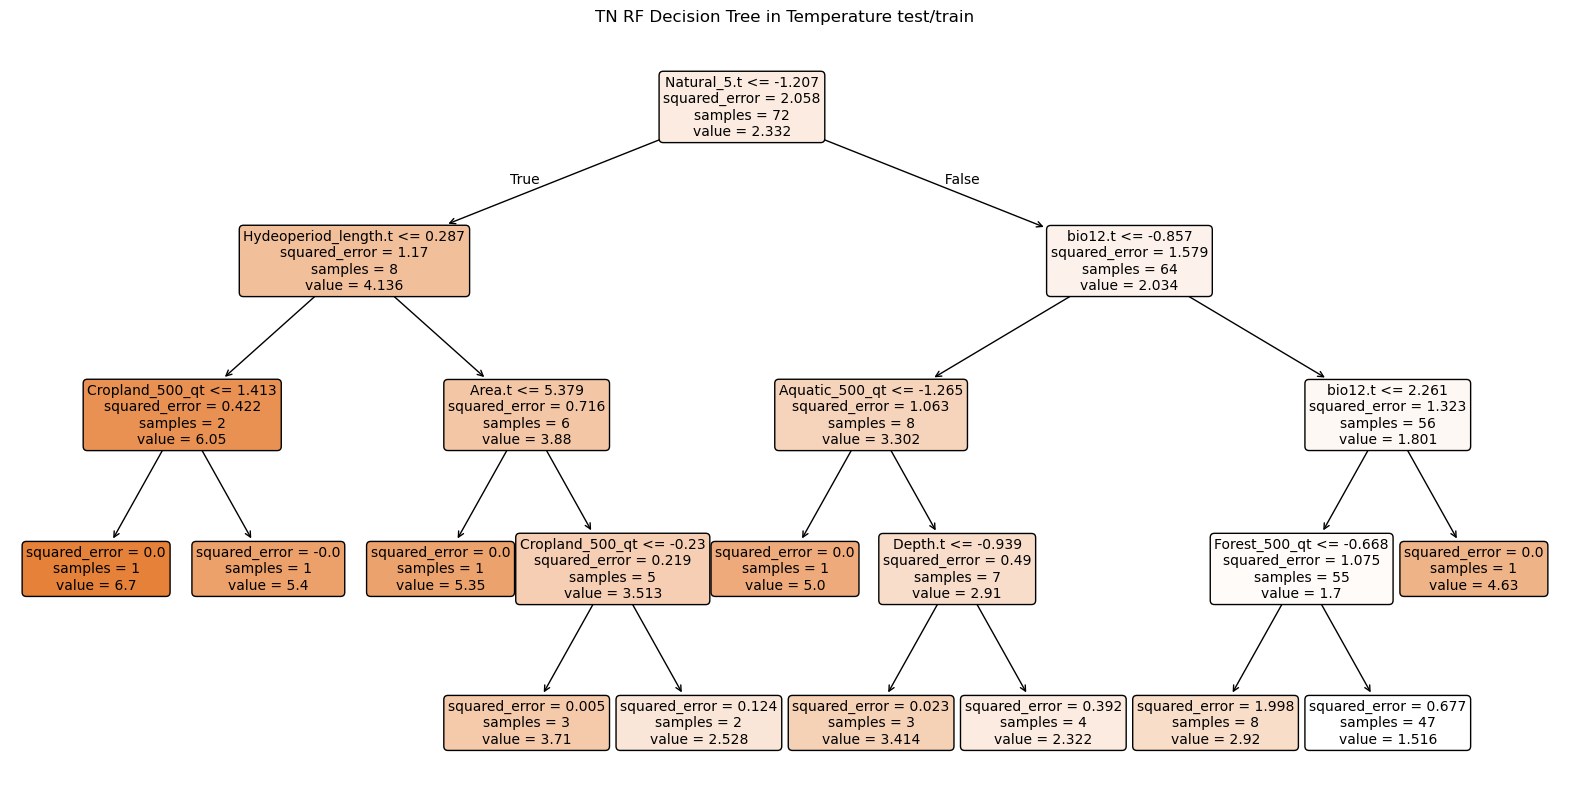

In [147]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True,max_depth=4)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

# Evaluating the model
print(f"{dependent_var} RF Decision Tree in {region} test/train")

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {round(oob_score,2)}')

# Making predictions on the same data or new data
predictions = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {round(mse,2)}')

r2 = r2_score(y_test, predictions)
print(f'R-squared:{round(r2,2)}')



# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title(f"{dependent_var} RF Decision Tree in {region} test/train" )
plt.show()